# Take kmeans/PCA clustered data

In [40]:
#Basic imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'
from sklearn import metrics #used for labeling

from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt 

#plotly imports
import plotly as py
import chart_studio.plotly as cs
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
clustered = pd.read_csv('X_w_clusters.csv', index_col=0)

In [4]:
clustered.head()

,number_of_trips_taken,qtemphigh,qtemplow,qprecipitation,qday_Friday,qday_Monday,qday_Saturday,qday_Sunday,qday_Thursday,qday_Tuesday,qday_Wednesday,qday1typical_Not at all typical,qday1typical_Not very typical,qday1typical_Somewhat typical,qday1typical_Very typical,qborough_home_Brooklyn,qborough_home_Manhattan,qborough_home_Queens,qborough_home_Staten Island,qborough_home_The Bronx,qsurveyzone_home_Inner Brooklyn,qsurveyzone_home_Inner Queens,qsurveyzone_home_Manhattan Core,qsurveyzone_home_Middle Queens,qsurveyzone_home_Northern Bronx,qsurveyzone_home_Northern Manhattan,qsurveyzone_home_Outer Brooklyn,qsurveyzone_home_Outer Queens,qsurveyzone_home_Southern Bronx,qsurveyzone_home_Staten Island,qtripdaytime_AM,qtripdaytime_NOON,qtripdaytime_PM,qborough_start_Brooklyn,qborough_start_Inner Brooklyn,qborough_start_Inner Queens,qborough_start_Manhattan,qborough_start_Manhattan Core,qborough_start_Middle Queens,qborough_start_Northern Bronx,qborough_start_Northern Manhattan,qborough_start_Outer Brooklyn,qborough_start_Outer Queens,qborough_start_Outside of NYC,qborough_start_Queens,qborough_start_Southern Bronx,qborough_start_Staten Island,qborough_start_The Bronx,surveyzone_start_Inner Brooklyn,surveyzone_start_Inner Queens,surveyzone_start_Manhattan Core,surveyzone_start_Middle Queens,surveyzone_start_NOT CODED,surveyzone_start_Northern Bronx,surveyzone_start_Northern Manhattan,surveyzone_start_Outer Brooklyn,surveyzone_start_Outer Queens,surveyzone_start_Southern Bronx,surveyzone_start_Staten Island,qday1tripend_Child's daycare facility or school,qday1tripend_Doctor's office or hospital,"qday1tripend_Entertainment event (i.e. sporting event, play, etc.)",qday1tripend_Friend or family member's home,"qday1tripend_Grocery store or market (including deli, bodega, etc.)",qday1tripend_Home,qday1tripend_Other,qday1tripend_Outside of New York City,qday1tripend_Park/Recreational area/Gym,qday1tripend_Restaurant or bar,"qday1tripend_Retail store (e.g. clothing, electronic, hardware, etc.)",qday1tripend_School,qday1tripend_Work,qborough_end_Brooklyn,qborough_end_Manhattan,qborough_end_Outside of NYC,qborough_end_Queens,qborough_end_Staten Island,qborough_end_The Bronx,surveyzone_end_Inner Brooklyn,surveyzone_end_Inner Queens,surveyzone_end_Manhattan Core,surveyzone_end_Middle Queens,surveyzone_end_Northern Bronx,surveyzone_end_Northern Manhattan,surveyzone_end_Outer Brooklyn,surveyzone_end_Outer Queens,surveyzone_end_Southern Bronx,surveyzone_end_Staten Island,qday1tripendcode_Airport,qday1tripendcode_Bus stop,qday1tripendcode_Child's daycare facility or school,qday1tripendcode_Commuter rail station,qday1tripendcode_Doctor's office or hospital,"qday1tripendcode_Entertainment event (i.e. sporting event, play, etc.)",qday1tripendcode_Friend or family member's home,qday1tripendcode_Grand Central Station,"qday1tripendcode_Grocery store or market (including deli, bodega, etc.)",qday1tripendcode_Home,qday1tripendcode_Other,qday1tripendcode_PATH Station,qday1tripendcode_Park and ride/parking lot,qday1tripendcode_Park/Recreational area/Gym,qday1tripendcode_Penn Station,qday1tripendcode_Restaurant or bar,"qday1tripendcode_Retail store (e.g. clothing, electronic, hardware, etc.)",qday1tripendcode_Road/tunnel/bridge,qday1tripendcode_School,qday1tripendcode_Work,qday1triplength_cat_0 to 5,qday1triplength_cat_11 to 15,qday1triplength_cat_16 to 20,qday1triplength_cat_180+,qday1triplength_cat_21 to 25,qday1triplength_cat_26 to 30,qday1triplength_cat_31 to 35,qday1triplength_cat_36 to 40,qday1triplength_cat_41 to 45,qday1triplength_cat_46 to 50,qday1triplength_cat_51 to 55,qday1triplength_cat_56 to 60,qday1triplength_cat_6 to 10,qday1triplength_cat_61 to 180,qdisability1_No,qdisability1_Yes,qdisability2_No,qdisability2_Yes,qdisability3_No,qdisability3_Yes,qdisability4_No,qdisability4_Yes,qdisability5_No,qdisability5_Yes,qdisability6_No,qdisability6_Yes,qdisability7_No,qdisability7_Yes,qdisability8_No,qdisability8_Yes,qdisability9_No,qdisability9_Yes,qage

In [8]:
clustered.shape

(7851, 199)

In [17]:
cluster0 = clustered[clustered['Cluster'] == 0].copy()
cluster0.shape

(7097, 199)

In [18]:
cluster1 = clustered[clustered['Cluster'] == 1].copy()
cluster1.shape

(754, 199)

# Recluster clusters

In [78]:
kmeans = KMeans(n_clusters = 5)

In [79]:
kmeans.fit(cluster0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [80]:
cluster0_clusters = kmeans.predict(cluster0)

In [81]:
cluster0['Cluster2'] = cluster0_clusters

In [82]:
cluster0.tail()

,number_of_trips_taken,qtemphigh,qtemplow,qprecipitation,qday_Friday,qday_Monday,qday_Saturday,qday_Sunday,qday_Thursday,qday_Tuesday,qday_Wednesday,qday1typical_Not at all typical,qday1typical_Not very typical,qday1typical_Somewhat typical,qday1typical_Very typical,qborough_home_Brooklyn,qborough_home_Manhattan,qborough_home_Queens,qborough_home_Staten Island,qborough_home_The Bronx,qsurveyzone_home_Inner Brooklyn,qsurveyzone_home_Inner Queens,qsurveyzone_home_Manhattan Core,qsurveyzone_home_Middle Queens,qsurveyzone_home_Northern Bronx,qsurveyzone_home_Northern Manhattan,qsurveyzone_home_Outer Brooklyn,qsurveyzone_home_Outer Queens,qsurveyzone_home_Southern Bronx,qsurveyzone_home_Staten Island,qtripdaytime_AM,qtripdaytime_NOON,qtripdaytime_PM,qborough_start_Brooklyn,qborough_start_Inner Brooklyn,qborough_start_Inner Queens,qborough_start_Manhattan,qborough_start_Manhattan Core,qborough_start_Middle Queens,qborough_start_Northern Bronx,qborough_start_Northern Manhattan,qborough_start_Outer Brooklyn,qborough_start_Outer Queens,qborough_start_Outside of NYC,qborough_start_Queens,qborough_start_Southern Bronx,qborough_start_Staten Island,qborough_start_The Bronx,surveyzone_start_Inner Brooklyn,surveyzone_start_Inner Queens,surveyzone_start_Manhattan Core,surveyzone_start_Middle Queens,surveyzone_start_NOT CODED,surveyzone_start_Northern Bronx,surveyzone_start_Northern Manhattan,surveyzone_start_Outer Brooklyn,surveyzone_start_Outer Queens,surveyzone_start_Southern Bronx,surveyzone_start_Staten Island,qday1tripend_Child's daycare facility or school,qday1tripend_Doctor's office or hospital,"qday1tripend_Entertainment event (i.e. sporting event, play, etc.)",qday1tripend_Friend or family member's home,"qday1tripend_Grocery store or market (including deli, bodega, etc.)",qday1tripend_Home,qday1tripend_Other,qday1tripend_Outside of New York City,qday1tripend_Park/Recreational area/Gym,qday1tripend_Restaurant or bar,"qday1tripend_Retail store (e.g. clothing, electronic, hardware, etc.)",qday1tripend_School,qday1tripend_Work,qborough_end_Brooklyn,qborough_end_Manhattan,qborough_end_Outside of NYC,qborough_end_Queens,qborough_end_Staten Island,qborough_end_The Bronx,surveyzone_end_Inner Brooklyn,surveyzone_end_Inner Queens,surveyzone_end_Manhattan Core,surveyzone_end_Middle Queens,surveyzone_end_Northern Bronx,surveyzone_end_Northern Manhattan,surveyzone_end_Outer Brooklyn,surveyzone_end_Outer Queens,surveyzone_end_Southern Bronx,surveyzone_end_Staten Island,qday1tripendcode_Airport,qday1tripendcode_Bus stop,qday1tripendcode_Child's daycare facility or school,qday1tripendcode_Commuter rail station,qday1tripendcode_Doctor's office or hospital,"qday1tripendcode_Entertainment event (i.e. sporting event, play, etc.)",qday1tripendcode_Friend or family member's home,qday1tripendcode_Grand Central Station,"qday1tripendcode_Grocery store or market (including deli, bodega, etc.)",qday1tripendcode_Home,qday1tripendcode_Other,qday1tripendcode_PATH Station,qday1tripendcode_Park and ride/parking lot,qday1tripendcode_Park/Recreational area/Gym,qday1tripendcode_Penn Station,qday1tripendcode_Restaurant or bar,"qday1tripendcode_Retail store (e.g. clothing, electronic, hardware, etc.)",qday1tripendcode_Road/tunnel/bridge,qday1tripendcode_School,qday1tripendcode_Work,qday1triplength_cat_0 to 5,qday1triplength_cat_11 to 15,qday1triplength_cat_16 to 20,qday1triplength_cat_180+,qday1triplength_cat_21 to 25,qday1triplength_cat_26 to 30,qday1triplength_cat_31 to 35,qday1triplength_cat_36 to 40,qday1triplength_cat_41 to 45,qday1triplength_cat_46 to 50,qday1triplength_cat_51 to 55,qday1triplength_cat_56 to 60,qday1triplength_cat_6 to 10,qday1triplength_cat_61 to 180,qdisability1_No,qdisability1_Yes,qdisability2_No,qdisability2_Yes,qdisability3_No,qdisability3_Yes,qdisability4_No,qdisability4_Yes,qdisability5_No,qdisability5_Yes,qdisability6_No,qdisability6_Yes,qdisability7_No,qdisability7_Yes,qdisability8_No,qdisability8_Yes,qdisability9_No,qdisability9_Yes,qage

# Cluster 0 metrics

In [83]:
#from learn lab: https://github.com/learn-co-students/ds-k-means-clustering-lab-nyc-ds-111819/tree/solution
labels = kmeans.labels_

metrics.silhouette_score(cluster0, labels, metric='euclidean')

#silhouette score when k = 5 : 0.13635157586819058

0.13783575358597625

In [84]:
#Calinski_Harabasz
# when k = 5 : 757.7421245964664
metrics.calinski_harabasz_score(cluster0, labels) 

757.7421245964664

In [49]:
kmeans.fit(cluster1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [50]:
cluster1_clusters = kmeans.predict(cluster1)

In [51]:
cluster1['Cluster2'] = cluster1_clusters

In [52]:
cluster1.head()

,number_of_trips_taken,qtemphigh,qtemplow,qprecipitation,qday_Friday,qday_Monday,qday_Saturday,qday_Sunday,qday_Thursday,qday_Tuesday,qday_Wednesday,qday1typical_Not at all typical,qday1typical_Not very typical,qday1typical_Somewhat typical,qday1typical_Very typical,qborough_home_Brooklyn,qborough_home_Manhattan,qborough_home_Queens,qborough_home_Staten Island,qborough_home_The Bronx,qsurveyzone_home_Inner Brooklyn,qsurveyzone_home_Inner Queens,qsurveyzone_home_Manhattan Core,qsurveyzone_home_Middle Queens,qsurveyzone_home_Northern Bronx,qsurveyzone_home_Northern Manhattan,qsurveyzone_home_Outer Brooklyn,qsurveyzone_home_Outer Queens,qsurveyzone_home_Southern Bronx,qsurveyzone_home_Staten Island,qtripdaytime_AM,qtripdaytime_NOON,qtripdaytime_PM,qborough_start_Brooklyn,qborough_start_Inner Brooklyn,qborough_start_Inner Queens,qborough_start_Manhattan,qborough_start_Manhattan Core,qborough_start_Middle Queens,qborough_start_Northern Bronx,qborough_start_Northern Manhattan,qborough_start_Outer Brooklyn,qborough_start_Outer Queens,qborough_start_Outside of NYC,qborough_start_Queens,qborough_start_Southern Bronx,qborough_start_Staten Island,qborough_start_The Bronx,surveyzone_start_Inner Brooklyn,surveyzone_start_Inner Queens,surveyzone_start_Manhattan Core,surveyzone_start_Middle Queens,surveyzone_start_NOT CODED,surveyzone_start_Northern Bronx,surveyzone_start_Northern Manhattan,surveyzone_start_Outer Brooklyn,surveyzone_start_Outer Queens,surveyzone_start_Southern Bronx,surveyzone_start_Staten Island,qday1tripend_Child's daycare facility or school,qday1tripend_Doctor's office or hospital,"qday1tripend_Entertainment event (i.e. sporting event, play, etc.)",qday1tripend_Friend or family member's home,"qday1tripend_Grocery store or market (including deli, bodega, etc.)",qday1tripend_Home,qday1tripend_Other,qday1tripend_Outside of New York City,qday1tripend_Park/Recreational area/Gym,qday1tripend_Restaurant or bar,"qday1tripend_Retail store (e.g. clothing, electronic, hardware, etc.)",qday1tripend_School,qday1tripend_Work,qborough_end_Brooklyn,qborough_end_Manhattan,qborough_end_Outside of NYC,qborough_end_Queens,qborough_end_Staten Island,qborough_end_The Bronx,surveyzone_end_Inner Brooklyn,surveyzone_end_Inner Queens,surveyzone_end_Manhattan Core,surveyzone_end_Middle Queens,surveyzone_end_Northern Bronx,surveyzone_end_Northern Manhattan,surveyzone_end_Outer Brooklyn,surveyzone_end_Outer Queens,surveyzone_end_Southern Bronx,surveyzone_end_Staten Island,qday1tripendcode_Airport,qday1tripendcode_Bus stop,qday1tripendcode_Child's daycare facility or school,qday1tripendcode_Commuter rail station,qday1tripendcode_Doctor's office or hospital,"qday1tripendcode_Entertainment event (i.e. sporting event, play, etc.)",qday1tripendcode_Friend or family member's home,qday1tripendcode_Grand Central Station,"qday1tripendcode_Grocery store or market (including deli, bodega, etc.)",qday1tripendcode_Home,qday1tripendcode_Other,qday1tripendcode_PATH Station,qday1tripendcode_Park and ride/parking lot,qday1tripendcode_Park/Recreational area/Gym,qday1tripendcode_Penn Station,qday1tripendcode_Restaurant or bar,"qday1tripendcode_Retail store (e.g. clothing, electronic, hardware, etc.)",qday1tripendcode_Road/tunnel/bridge,qday1tripendcode_School,qday1tripendcode_Work,qday1triplength_cat_0 to 5,qday1triplength_cat_11 to 15,qday1triplength_cat_16 to 20,qday1triplength_cat_180+,qday1triplength_cat_21 to 25,qday1triplength_cat_26 to 30,qday1triplength_cat_31 to 35,qday1triplength_cat_36 to 40,qday1triplength_cat_41 to 45,qday1triplength_cat_46 to 50,qday1triplength_cat_51 to 55,qday1triplength_cat_56 to 60,qday1triplength_cat_6 to 10,qday1triplength_cat_61 to 180,qdisability1_No,qdisability1_Yes,qdisability2_No,qdisability2_Yes,qdisability3_No,qdisability3_Yes,qdisability4_No,qdisability4_Yes,qdisability5_No,qdisability5_Yes,qdisability6_No,qdisability6_Yes,qdisability7_No,qdisability7_Yes,qdisability8_No,qdisability8_Yes,qdisability9_No,qdisability9_Yes,qage

# Cluster 1 metrics

In [53]:
#from learn lab: https://github.com/learn-co-students/ds-k-means-clustering-lab-nyc-ds-111819/tree/solution
labels = kmeans.labels_

metrics.silhouette_score(cluster1, labels, metric='euclidean')
#output for n=2 : 0.07208456284155712
#output for n = 5 : 0.13875553236443366

0.13875553236443366

In [54]:
# for cluster 1
#Calinski_Harabasz for 2 clusters = 61.740214970054524
# when k = 5 : 80.85627865489708
metrics.calinski_harabasz_score(cluster1, labels) 

80.85627865489708

In [55]:
#cluster 1

# Distortion is the average of the squared distances from the clusters centers of each cluster
distortions = [] 
# Inertia is the sum of squared distances of samples to their closest cluster center.
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(cluster1) 
    kmeanModel.fit(cluster1)     
      
    distortions.append(sum(np.min(cdist(cluster1, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / cluster1.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(cluster1, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / cluster1.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

In [56]:
#cluster1
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 


1 : 4.07322109832274
2 : 3.777163332620622
3 : 3.6030297230701667
4 : 3.492513481660996
5 : 3.3907600961842457
6 : 3.342910367708432
7 : 3.2981884622717863
8 : 3.2589495624634024
9 : 3.225888168261951


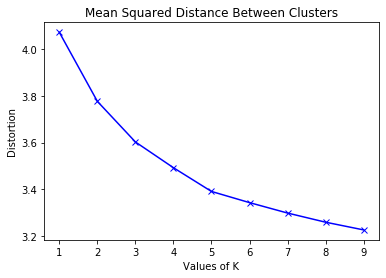

In [57]:
#for cluster 1
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('Mean Squared Distance Between Clusters') 
plt.show() 

In [58]:
#cluster 0

# Distortion is the average of the squared distances from the clusters centers of each cluster
distortions = [] 
# Inertia is the sum of squared distances of samples to their closest cluster center.
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(cluster0) 
    kmeanModel.fit(cluster0)     
      
    distortions.append(sum(np.min(cdist(cluster0, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / cluster0.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(cluster0, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / cluster1.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

In [59]:
#cluster0
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 38.751036247093865
2 : 36.256972381664234
3 : 34.89615534376883
4 : 33.78610825177122
5 : 32.814538199717944
6 : 32.2308814523071
7 : 31.812574612999747
8 : 31.451225120233982
9 : 31.20048887963231


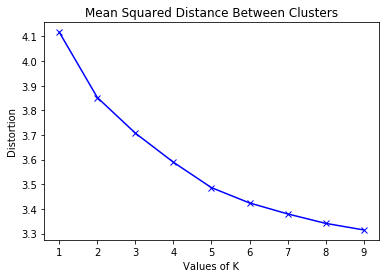

In [60]:
#for cluster 0
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('Mean Squared Distance Between Clusters') 
plt.show() 

# PCA

In [85]:
pca_2d = PCA(n_components=2)


In [86]:
#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(cluster0.drop(["Cluster2"], axis=1)))


In [94]:

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]


In [95]:
# We concatenate these newly created DataFrames to X so 
# that they can be used by X as columns.
X = pd.concat([cluster0,PCs_2d], axis=1, join='inner')

In [96]:
# And we create one new column for plotX so that we can use it for
# 1-D visualization.
X["dummy"] = 0

In [97]:
# Each of these new DataFrames will hold all of the values contained
# in exacltly one of the clusters. For example, all of the values
# contained within the DataFrame, cluster0 will belong to 'cluster 0',
# and all the values contained in DataFrame, cluster1 will belong to
# 'cluster 1', etc.
#Note that all of the DataFrames below are sub-DataFrames of 'plotX'.
#This is because we intend to plot the values contained within each of these DataFrames.

cluster0_0 = X[X["Cluster2"] == 0]
cluster0_1 = X[X["Cluster2"] == 1]
cluster0_2 = X[X["Cluster2"] == 2]
cluster0_3 = X[X["Cluster2"] == 3]
cluster0_4 = X[X["Cluster2"] == 4]

In [98]:
#This is needed so we can display plotly plots properly
init_notebook_mode(connected=True)

In [101]:
# Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0_0["PC1_2d"],
                    y = cluster0_0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster0_1["PC1_2d"],
                    y = cluster0_1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster0_2["PC1_2d"],
                    y = cluster0_2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#trace4 is for 'Cluster 3'
trace4 = go.Scatter(
                    x = cluster0_2["PC1_2d"],
                    y = cluster0_2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(0, 255, 225, 0.8)'),
                    text = None)

#trace5 is for 'Cluster 4'
trace5 = go.Scatter(
                    x = cluster0_2["PC1_2d"],
                    y = cluster0_2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'rgba(255, 200, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3, trace4, trace5] #, trace3

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

# T-SNE

In [102]:
#initialize model
kmeans = KMeans(n_clusters=2)

In [103]:
#fit model
kmeans.fit(cluster0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [104]:
#Find which cluster each data-point belongs to
clusters = kmeans.predict(cluster0)

In [105]:
#add cluster vector to X df
cluster0["Cluster2"] = clusters

In [106]:
#plotX will hold the values we wish to plot
plotX = pd.DataFrame(cluster0)
plotX.columns = cluster0.columns

In [107]:
#Set our perplexity (usually between 30 and 50)
perplexity = 50

In [108]:
#T-SNE with two dimensions
tsne_2d = TSNE(n_components=2, perplexity=perplexity)

In [109]:
#This DataFrame contains two dimensions, built by T-SNE
TCs_2d = pd.DataFrame(tsne_2d.fit_transform(plotX.drop(["Cluster2"], axis=1)))


In [110]:
#"TC1_2d" means: 'The first component of the components created for 2-D visualization, by T-SNE.'
#And "TC2_2d" means: 'The second component of the components created for 2-D visualization, by T-SNE.'
TCs_2d.columns = ["TC1_2d","TC2_2d"]

In [112]:
plotX = pd.concat([plotX,TCs_2d], axis=1, join='inner')

In [113]:
plotX["dummy"] = 0

In [114]:
cluster0 = plotX[plotX["Cluster2"] == 0]
cluster1 = plotX[plotX["Cluster2"] == 1]
cluster2 = plotX[plotX["Cluster2"] == 2]

In [117]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["TC1_2d"],
                    y = cluster0["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["TC1_2d"],
                    y = cluster1["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

# #trace3 is for 'Cluster 2'
# trace3 = go.Scatter(
#                     x = cluster2["TC1_2d"],
#                     y = cluster2["TC2_2d"],
#                     mode = "markers",
#                     name = "Cluster 2",
#                     marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
#                     text = None)

data = [trace1, trace2] #, trace3

title = "Visualizing Clusters in Two Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)